In [1]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt

In [2]:
import mdtraj as md
import seaborn as sns

## Make HMM from MSM

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

In [4]:
from scipy.stats import skew, kurtosis

In [5]:
M = pickle.load(open('Data/Chodera_data/Processed/MSM_lag1.0.pickle', 'rb'))
HMM = pickle.load(open('Data/Chodera_data/Processed/HMM_lag1.0.pickle', 'rb'))

In [6]:
stat_dist = HMM.stationary_distribution_obs

In [7]:
membership = HMM.metastable_assignments
print(membership.shape)
n_sets = HMM.nstates

(500,)


In [8]:
free_energy = -np.log(stat_dist)
free_energy = np.abs(np.max(free_energy)-free_energy)

In [9]:
stat_dist_by_state = [stat_dist[np.where(membership==i)[0]] for i in range(n_sets)]
free_energy_by_state = [free_energy[np.where(membership==i)[0]] for i in range(n_sets)]

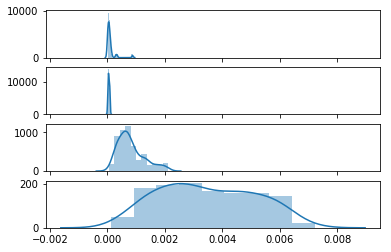

In [10]:
fig, axes = plt.subplots(n_sets, sharex=True)
tol = 1e-7
for i, ax in enumerate(axes):
#     ax.hist(free_energy_by_state[i], bins=10)
    sns.distplot(stat_dist_by_state[i], ax=ax)

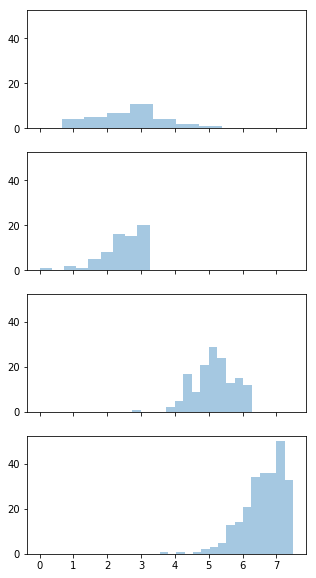

In [26]:
fig, axes = plt.subplots(n_sets, sharex=True, sharey=True, figsize=(5,10))
tol = 1e-7
for i, ax in enumerate(axes):
#     ax.hist(free_energy_by_state[i], bins=10)
    sns.distplot(free_energy_by_state[i], ax=ax, kde=False)

In [12]:
properties = {}
properties['mean'] = [np.mean(x) for x in free_energy_by_state]
properties['max'] = [np.max(x) for x in free_energy_by_state]
properties['std'] = [np.std(x) for x in free_energy_by_state]
properties['skew'] = [skew(x) for x in free_energy_by_state]
properties['kurtosis'] = [kurtosis(x) for x in free_energy_by_state]

In [13]:
properties

{'kurtosis': [0.36622107154810113,
  2.6875545353416754,
  0.7540433289221093,
  2.451736386244396],
 'max': [5.389165093913082,
  3.2564803865152321,
  6.267141438773189,
  7.4949406579953024],
 'mean': [2.641521732662846,
  2.4701679832704619,
  5.1600571433475722,
  6.6137305877192425],
 'skew': [0.19540249659779124,
  -1.3696788462249843,
  -0.4574843290473749,
  -1.2553101419550925],
 'std': [1.0197931882292639,
  0.61910010010127448,
  0.59092368507252779,
  0.61845472430611448]}

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [15]:
scaled_properties = {}
for k, v in properties.items():
    scaled_properties[k] = [x[0] for x in scaler.fit_transform(np.array(v).reshape(-1,1))]

In [16]:
scaled_properties

{'kurtosis': [0.0, 1.0, 0.16706874019737797, 0.89841263533421833],
 'max': [0.50317440079557862, 0.0, 0.71031951685762384, 0.99999999999999989],
 'mean': [0.041354207900324291, 0.0, 0.64917304668911768, 1.0000000000000002],
 'skew': [1.0000000000000002, 0.0, 0.58284160204247182, 0.073075246085048118],
 'std': [0.99999999999999978, 0.065699274071369995, 0.0, 0.064194443836509185]}

In [17]:
pickle.dump( scaled_properties, open('Data/Chodera_data/Processed/static_properties_01_scale.pickle', 'wb'))

In [18]:
scaled_properties = {}
for k, v in properties.items():
    signs = np.sign(v)
    v = np.abs(v)
    scaled_v = np.array(v)/np.max(v)
    scaled_v = scaled_v*signs
    scaled_properties[k] = list(scaled_v)

In [19]:
pickle.dump(scaled_properties, open('Data/Chodera_data/Processed/static_properties_max_scale.pickle', 'wb'))

In [20]:
scaled_properties

{'kurtosis': [0.13626554056196763,
  1.0,
  0.28056856856534296,
  0.91225549249466698],
 'max': [0.71904039535845243, 0.43449048299553239, 0.83618292989253407, 1.0],
 'mean': [0.39939965767093333, 0.37349086880817506, 0.78020371028252422, 1.0],
 'skew': [0.142663002452251, -1.0, -0.33400846505606924, -0.91649961990352191],
 'std': [1.0, 0.60708397275751569, 0.57945443438251309, 0.60645112307523785]}